In [95]:
# importing libraries, etc...

import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

# Our First Model: Classification of Flower Species with k-NN

In [160]:
# loading and viewing the Iris dataset

iris = pd.read_csv("iris.csv")

iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [97]:
# statistics about the features + target

iris.describe(include="all")

,sepal.length,sepal.width,petal.length,petal.width,variety
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [98]:
# scaling the features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(iris.iloc[:,:-1])

iris.iloc[:,:-1] = scaler.transform(iris.iloc[:,:-1])

iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,0.222222,0.625000,0.067797,0.041667,Setosa
1,0.166667,0.416667,0.067797,0.041667,Setosa
2,0.111111,0.500000,0.050847,0.041667,Setosa
3,0.083333,0.458333,0.084746,0.041667,Setosa
4,0.194444,0.666667,0.067797,0.041667,Setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,Virginica
146,0.555556,0.208333,0.677966,0.750000,Virginica
147,0.611111,0.416667,0.711864,0.791667,Virginica
148,0.527778,0.583333,0.745763,0.916667,Virginica


In [99]:
# splitting into training and test set

from sklearn.model_selection import train_test_split

iris_features_train, iris_features_test, iris_target_train, iris_target_test = train_test_split(iris.iloc[:,:-1], 
                                                                                                iris.iloc[:,-1],
                                                                                                random_state=99)

#iris_features_train, iris_features_test, iris_target_train, iris_target_test = train_test_split(iris.iloc[:,:-1], 
#                                                                                                iris.iloc[:,-1],
#                                                                                                random_state=99)

In [100]:
iris_features_train

,sepal.length,sepal.width,petal.length,petal.width
112,0.694444,0.416667,0.762712,0.833333
97,0.527778,0.375000,0.559322,0.500000
86,0.666667,0.458333,0.627119,0.583333
67,0.416667,0.291667,0.525424,0.375000
126,0.527778,0.333333,0.644068,0.708333
...,...,...,...,...
148,0.527778,0.583333,0.745763,0.916667
149,0.444444,0.416667,0.694915,0.708333
68,0.527778,0.083333,0.593220,0.583333
35,0.194444,0.500000,0.033898,0.041667


In [101]:
iris_target_train

112     Virginica
97     Versicolor
86     Versicolor
67     Versicolor
126     Virginica
          ...    
148     Virginica
149     Virginica
68     Versicolor
35         Setosa
129     Virginica
Name: variety, Length: 112, dtype: object

In [102]:
iris_features_test

,sepal.length,sepal.width,petal.length,petal.width
139,0.722222,0.458333,0.745763,0.833333
8,0.027778,0.375000,0.067797,0.041667
74,0.583333,0.375000,0.559322,0.500000
120,0.722222,0.500000,0.796610,0.916667
4,0.194444,0.666667,0.067797,0.041667
89,0.333333,0.208333,0.508475,0.500000
78,0.472222,0.375000,0.593220,0.583333
108,0.666667,0.208333,0.813559,0.708333
24,0.138889,0.583333,0.152542,0.041667
70,0.444444,0.500000,0.644068,0.708333


In [103]:
iris_target_test

139     Virginica
8          Setosa
74     Versicolor
120     Virginica
4          Setosa
89     Versicolor
78     Versicolor
108     Virginica
24         Setosa
70     Versicolor
122     Virginica
87     Versicolor
127     Virginica
94     Versicolor
124     Virginica
16         Setosa
9          Setosa
71     Versicolor
81     Versicolor
106     Virginica
84     Versicolor
51     Versicolor
46         Setosa
80     Versicolor
117     Virginica
6          Setosa
43         Setosa
147     Virginica
58     Versicolor
104     Virginica
30         Setosa
116     Virginica
15         Setosa
72     Versicolor
92     Versicolor
2          Setosa
49         Setosa
135     Virginica
Name: variety, dtype: object

In [104]:
# concatenating features and target to make plotting easier

iris_train = pd.concat([iris_features_train, iris_target_train], 
                       axis=1)
iris_test = pd.concat([iris_features_test, iris_target_test], 
                      axis=1)
iris_train.reset_index(inplace=True, 
                       drop=True)
iris_test.reset_index(inplace=True, 
                      drop=True)

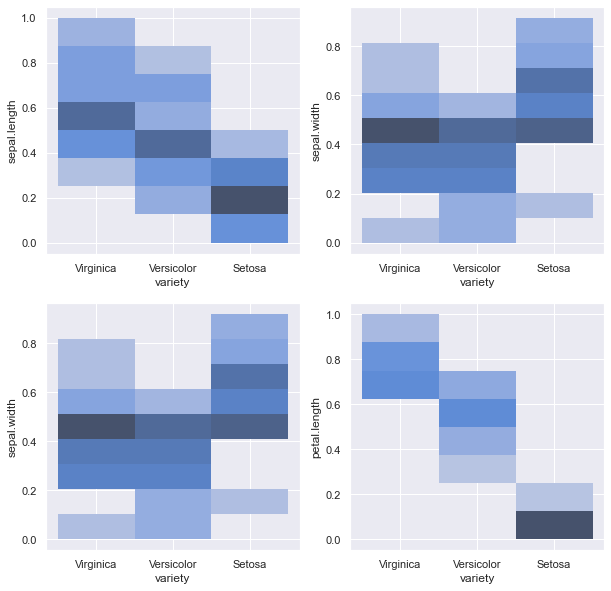

In [105]:
# plotting each feature against the target 

fig, axes = plt.subplots(2,2,
                         figsize=(10,10))

for i in range(2):
    for j in range(2):
        sns.histplot(ax=axes[i, j], 
                     data=iris_train, x="variety", 
                     y=iris_train.columns[i+j])  

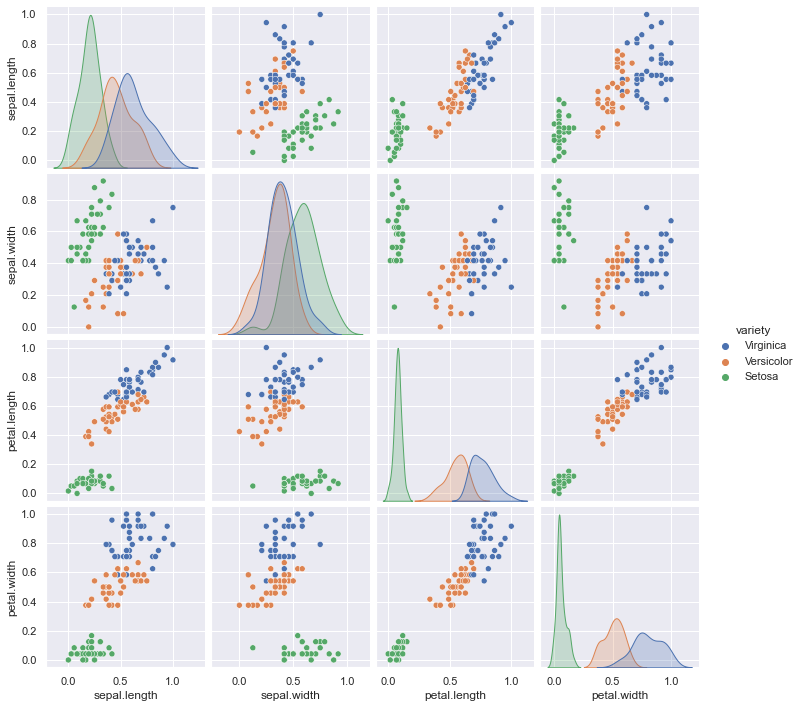

In [106]:
# plotting every feature against every other feature, with observations color-coded by target

sns.pairplot(iris_train, hue="variety")

In [107]:
# fitting k-NN on the training set

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1).fit(iris_features_train, iris_target_train)

In [108]:
# testing

knn.predict(np.array([[0.4, 0.3, 0.9, 0.1]]))

C:\Users\lenna\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Versicolor'], dtype=object)

In [109]:
# predictions for all items in test set

knn.predict(iris_features_test)

array(['Virginica', 'Setosa', 'Versicolor', 'Virginica', 'Setosa',
       'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Virginica',
       'Virginica', 'Versicolor', 'Virginica', 'Versicolor', 'Virginica',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Setosa', 'Versicolor', 'Virginica',
       'Setosa', 'Setosa', 'Virginica', 'Versicolor', 'Virginica',
       'Setosa', 'Virginica', 'Setosa', 'Virginica', 'Versicolor',
       'Setosa', 'Setosa', 'Virginica'], dtype=object)

In [110]:
# computing the score on the test set

knn = KNeighborsClassifier(n_neighbors = 7).fit(iris_features_train, iris_target_train)
print("Test set score: {:.2f}".format(knn.score(iris_features_test, iris_target_test)))

Test set score: 0.97


In [162]:
# if we hadn't scaled the features...

iris_unscaled = pd.read_csv("iris.csv")
iris_features_train_unscaled, iris_features_test_unscaled, iris_target_train, iris_target_test = train_test_split(iris_unscaled.iloc[:,:-1], 
                                                                                                                  iris_unscaled.iloc[:,-1], 
                                                                                                                  random_state=99)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(iris_features_train_unscaled, iris_target_train)
print("Test set score: {:.2f}".format(knn.score(iris_features_test_unscaled, iris_target_test)))

Test set score: 0.92


In [112]:
# if we hadn't divided our data into a training and test set...

knn = KNeighborsClassifier(n_neighbors = 1).fit(iris.iloc[:,:-1], iris.iloc[:,-1])
print("Score: {:.2f}".format(knn.score(iris.iloc[:,:-1], iris.iloc[:,-1])))

Score: 1.00


<AxesSubplot:xlabel='k', ylabel='Score'>

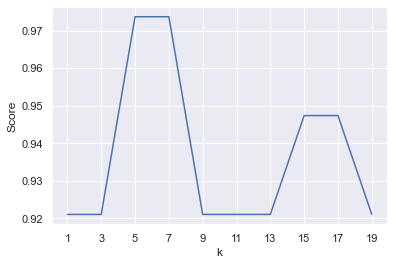

In [113]:
# plotting the score for different values of k

neighbors_settings = [k for k in range(1,21,2)]
scores = []

for k in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(iris_features_train, iris_target_train)
    scores.append(knn.score(iris_features_test, iris_target_test))
    
settingsPlot = sns.lineplot(x=neighbors_settings, y=scores)
settingsPlot.set_xticks(neighbors_settings)
settingsPlot.set_xlabel("k")
settingsPlot.set_ylabel("Score")

settingsPlot

# k-NN on Breast Cancer dataset

In [163]:
# loading and viewing the Breast Cancer dataset

bc = pd.read_csv("breast_cancer.csv")
bc = bc.iloc[:,1:-1]

bc

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [115]:
diagnosis = pd.get_dummies(data=bc["diagnosis"], drop_first=True, prefix="diagnosis")

bc = pd.concat([diagnosis, bc], axis=1)
bc = bc.drop(columns="diagnosis")

In [116]:
# retrieving info on the columns

bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis_M              569 non-null    uint8  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [117]:
# how often does each target label appear?

bc["diagnosis_M"].value_counts()

0    357
1    212
Name: diagnosis_M, dtype: int64

In [118]:
# scaling the features

scaler = MinMaxScaler().fit(bc.iloc[:,1:])

bc.iloc[:,1:] = scaler.transform(bc.iloc[:,1:])

bc

,diagnosis_M,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,1,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,1,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,1,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [119]:
# splitting into train, test set

bc_features_train, bc_features_test, bc_target_train, bc_target_test = train_test_split(bc.iloc[:,1:], 
                                                                                        bc.iloc[:,0], 
                                                                                        random_state=99)

## Overfitting and Underfitting

<AxesSubplot:xlabel='k', ylabel='score'>

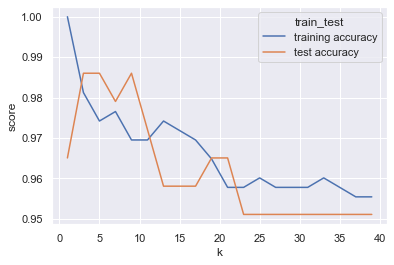

In [120]:
# plotting results of k-NN for different values of k to show overfitting and underfitting

neighbors = []
training_accuracy = []
test_accuracy = []
neighbors_settings = [n for n in range(1,41,2)]

for k in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=k).fit(bc_features_train, bc_target_train)
    neighbors.append(k)
    training_accuracy.append(knn.score(bc_features_train, bc_target_train))
    test_accuracy.append(knn.score(bc_features_test, bc_target_test))

results = pd.DataFrame([neighbors, training_accuracy, test_accuracy]).T
results.columns = ["k", "training accuracy", "test accuracy"]
results = pd.melt(results, 
                  id_vars='k', 
                  var_name="train_test", 
                  value_name="score")

sns.lineplot(x='k', 
             y='score', 
             hue='train_test', 
             data=results)

# Regression: Predicting Insurance Prices

In [121]:
# loading and viewing the dataset

ins = pd.read_csv("insurance.csv")

ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [122]:
# creating dummy variables for sex, smoker and region

sex_male = pd.get_dummies(data=ins["sex"], drop_first=True, prefix="sex")
smoker = pd.get_dummies(data=ins["smoker"], drop_first=True, prefix="smoker")
region = pd.get_dummies(data=ins["region"], prefix="region")

ins = pd.concat([sex_male, smoker, region, ins], axis=1)
ins = ins.drop(columns=["sex", "smoker", "region"])

In [123]:
ins      

,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,0,1,0,0,0,1,19,27.900,0,16884.92400
1,1,0,0,0,1,0,18,33.770,1,1725.55230
2,1,0,0,0,1,0,28,33.000,3,4449.46200
3,1,0,0,1,0,0,33,22.705,0,21984.47061
4,1,0,0,1,0,0,32,28.880,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,1,0,0,1,0,0,50,30.970,3,10600.54830
1334,0,0,1,0,0,0,18,31.920,0,2205.98080
1335,0,0,0,0,1,0,18,36.850,0,1629.83350
1336,0,0,0,0,0,1,21,25.800,0,2007.94500


In [124]:
# scaling the features

scaler = MinMaxScaler().fit(ins.iloc[:,:-1])

ins.iloc[:,:-1] = scaler.transform(ins.iloc[:,:-1])

ins.describe()
ins

,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,0.0,1.0,0.0,0.0,0.0,1.0,0.021739,0.321227,0.0,16884.92400
1,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.479150,0.2,1725.55230
2,1.0,0.0,0.0,0.0,1.0,0.0,0.217391,0.458434,0.6,4449.46200
3,1.0,0.0,0.0,1.0,0.0,0.0,0.326087,0.181464,0.0,21984.47061
4,1.0,0.0,0.0,1.0,0.0,0.0,0.304348,0.347592,0.0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,1.0,0.0,0.0,1.0,0.0,0.0,0.695652,0.403820,0.6,10600.54830
1334,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.429379,0.0,2205.98080
1335,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.562012,0.0,1629.83350
1336,0.0,0.0,0.0,0.0,0.0,1.0,0.065217,0.264730,0.0,2007.94500


In [125]:
# splitting into training set and test set

ins_features_train, ins_features_test, ins_target_train, ins_target_test = train_test_split(ins.iloc[:,:-1], 
                                                                                            ins.iloc[:,-1], 
                                                                                            random_state=99)

In [126]:
# concatenating features and target to make plotting easier

ins_train = pd.concat([ins_features_train, ins_target_train], axis=1)
ins_test = pd.concat([ins_features_test, ins_target_test], axis=1)

In [127]:
# fitting K-Nearest Neighbors Regression on training set
# computing training, test scores

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 7).fit(ins_features_train, ins_target_train)

print("Training set score: {:.3f}".format(knr.score(ins_features_train, ins_target_train)))
print("Test set score: {:.3f}".format(knr.score(ins_features_test, ins_target_test)))

Training set score: 0.831
Test set score: 0.735


In [128]:
# linear regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(ins_features_train, ins_target_train)

print("Training set score: {:.3f}".format(lr.score(ins_features_train, ins_target_train)))
print("Test set score: {:.3f}".format(lr.score(ins_features_test, ins_target_test)))

print()

# Having a look at the coefficients

for col, coef in zip(ins_features_train.columns, lr.coef_):
    print("{:20}{:.2f}".format(col, coef))

Training set score: 0.758
Test set score: 0.719

sex_male            -355.93
smoker_yes          23910.86
region_northeast    715.44
region_northwest    -61.95
region_southeast    -262.08
region_southwest    -391.41
age                 13134.81
bmi                 11815.10
children            3140.17


In [129]:
print("Training set score: {:.3f}".format(lr.score(ins_features_train, ins_target_train)))
print("Test set score: {:.3f}".format(lr.score(ins_features_test, ins_target_test)))

Training set score: 0.758
Test set score: 0.719


In [130]:
# getting a table of correlations of the features and target
ins_train.corr()

,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
sex_male,1.000000,0.084982,0.002750,0.016680,-0.008193,-0.011062,-0.001893,0.037573,0.008750,0.058052
smoker_yes,0.084982,1.000000,-0.014345,-0.051865,0.046348,0.018550,-0.010117,0.014088,0.009117,0.779973
region_northeast,0.002750,-0.014345,1.000000,-0.319540,-0.335640,-0.314459,0.004219,-0.154376,-0.021601,-0.002631
region_northwest,0.016680,-0.051865,-0.319540,1.000000,-0.352460,-0.330217,0.012026,-0.143353,0.029643,-0.060026
region_southeast,-0.008193,0.046348,-0.335640,-0.352460,1.000000,-0.346856,-0.027592,0.272108,-0.038393,0.055833
region_southwest,-0.011062,0.018550,-0.314459,-0.330217,-0.346856,1.000000,0.012207,0.015422,0.030976,0.005474
age,-0.001893,-0.010117,0.004219,0.012026,-0.027592,0.012207,1.000000,0.100549,0.051829,0.341543
bmi,0.037573,0.014088,-0.154376,-0.143353,0.272108,0.015422,0.100549,1.000000,0.013566,0.197016
children,0.008750,0.009117,-0.021601,0.029643,-0.038393,0.030976,0.051829,0.013566,1.000000,0.087100
charges,0.058052,0.779973,-0.002631,-0.060026,0.055833,0.005474,0.341543,0.197016,0.087100,1.000000


In [131]:
# only including the features that have a correlation of >0.1 or <-0.1 with the target

ins_include = ins_train.loc[:,[col for col in ins_train.columns if ins_train.corr().loc["charges", col] > 0.1]]

print("Features included:")
for col in ins_include.columns[:-1]:
    print(col)
print()

ins_features_train_inc, ins_features_test_inc, ins_target_train_inc, ins_target_test_inc = train_test_split(ins_include.iloc[:,:-1], 
                                                                                            ins_include.iloc[:,-1], 
                                                                                            random_state=99)

lr = LinearRegression().fit(ins_features_train_inc, ins_target_train_inc)

print("Training set score: {:.3f}".format(lr.score(ins_features_train_inc, ins_target_train_inc)))
print("Test set score: {:.3f}".format(lr.score(ins_features_test_inc, ins_target_test_inc)))

Features included:
smoker_yes
age
bmi

Training set score: 0.737
Test set score: 0.799


# Ridge (L2) & Lasso (L1) Regularization

In [132]:
# training Ridge regression

from sklearn.linear_model import Ridge

ins_features_train_inc, ins_features_test_inc, ins_target_train, ins_target_test = train_test_split(ins.iloc[:,:-1], 
                                                                                                    ins.iloc[:,-1], 
                                                                                                    random_state=99)

ridge = Ridge(alpha = 10).fit(ins_features_train_inc, ins_target_train)
print("Training set score: {:.3f}".format(ridge.score(ins_features_train_inc, ins_target_train)))
print("Test set score: {:.3f}".format(ridge.score(ins_features_test_inc, ins_target_test)))

print("Average coefficient magnitude")

Training set score: 0.753
Test set score: 0.721
Average coefficient magnitude


In [133]:
# training Lasso regression

from sklearn.linear_model import Lasso

ins_features_train_inc, ins_features_test_inc, ins_target_train, ins_target_test = train_test_split(ins.iloc[:,:-1], 
                                                                                                    ins.iloc[:,-1], 
                                                                                                    random_state=99)

lasso = Lasso(alpha=100).fit(ins_features_train_inc, ins_target_train)
print("Training set score: {:.3f}".format(lasso.score(ins_features_train_inc, ins_target_train)))
print("Test set score: {:.3f}".format(lasso.score(ins_features_test_inc, ins_target_test)))

Training set score: 0.753
Test set score: 0.723


In [134]:
# further demonstrating Ridge and Lasso by subsampling dataset

ins_sample = ins.sample(n=150, random_state=123)

ins_sample

,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
650,0.0,0.0,0.0,0.0,1.0,0.0,0.673913,0.718859,0.4,9800.88820
319,1.0,0.0,1.0,0.0,0.0,0.0,0.304348,0.575061,0.2,4667.60765
314,0.0,1.0,0.0,0.0,0.0,1.0,0.195652,0.415389,0.0,34838.87300
150,1.0,0.0,0.0,1.0,0.0,0.0,0.369565,0.219801,0.2,5125.21570
336,1.0,0.0,0.0,0.0,1.0,0.0,0.913043,0.263115,0.0,12142.57860
...,...,...,...,...,...,...,...,...,...,...
611,0.0,0.0,0.0,0.0,0.0,1.0,0.434783,0.506860,0.4,6571.54400
203,0.0,1.0,0.0,0.0,1.0,0.0,0.195652,0.541297,0.0,37133.89820
993,1.0,0.0,0.0,0.0,1.0,0.0,0.434783,0.331181,0.2,5484.46730
937,0.0,0.0,0.0,1.0,0.0,0.0,0.456522,0.222357,1.0,8965.79575


In [135]:
# Linear Regression on subsampled dataset

ins_features_train_sample, ins_features_test_sample, ins_target_train_sample, ins_target_test_sample = train_test_split(ins_sample.iloc[:,:-1], 
                                                                                                                        ins_sample.iloc[:,-1], 
                                                                                                                        random_state=99)

lr = LinearRegression().fit(ins_features_train_sample, ins_target_train_sample)

print("Training set score: {:.3f}".format(lr.score(ins_features_train_sample, ins_target_train_sample)))
print("Test set score: {:.3f}".format(lr.score(ins_features_test_sample, ins_target_test_sample)))

Training set score: 0.785
Test set score: 0.722


In [136]:
# Ridge Regression on subsampled dataset

ridge = Ridge(alpha=1).fit(ins_features_train_sample, ins_target_train_sample)
print("Training set score: {:.3f}".format(ridge.score(ins_features_train_sample, ins_target_train_sample)))
print("Test set score: {:.3f}".format(ridge.score(ins_features_test_sample, ins_target_test_sample)))

Training set score: 0.779
Test set score: 0.737


In [137]:
# Lasso Regression on subsampled dataset

lasso = Lasso(alpha=200).fit(ins_features_train_sample, ins_target_train_sample)
print("Training set score: {:.3f}".format(lasso.score(ins_features_train_sample, ins_target_train_sample)))
print("Test set score: {:.3f}".format(lasso.score(ins_features_test_sample, ins_target_test_sample)))
print("Features used: {}".format(list(ins_features_train_sample.columns[(lasso.coef_ != 0).ravel()])))

Training set score: 0.767
Test set score: 0.755
Features used: ['smoker_yes', 'age', 'bmi']


# Logistic Regression & Linear SVM

<AxesSubplot:xlabel='C', ylabel='score'>

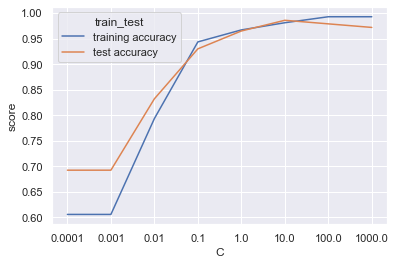

In [138]:
# training Logistic Regression with different values of C

from sklearn.linear_model import LogisticRegression

C_settings = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
training_accuracy = []
test_accuracy = []

for c in C_settings:
    logreg = LogisticRegression(max_iter=5000, C=c).fit(bc_features_train, bc_target_train)
    training_accuracy.append(logreg.score(bc_features_train, bc_target_train))
    test_accuracy.append(logreg.score(bc_features_test, bc_target_test)) 
    
results = pd.DataFrame([C_settings, training_accuracy, test_accuracy]).T
results.columns = ["C", "training accuracy", "test accuracy"]
results["C"] = results["C"].astype(str)
results = pd.melt(results, 
                  id_vars='C',
                  var_name="train_test",
                  value_name="score")

sns.lineplot(x='C', y='score', hue='train_test', data=results)

In [139]:
logreg = LogisticRegression(max_iter=5000, C=10).fit(bc_features_train, bc_target_train)
print("Training set score: {:.3f}".format(logreg.score(bc_features_train, bc_target_train)))
print("Test set score: {:.3f}".format(logreg.score(bc_features_test, bc_target_test)))

Training set score: 0.981
Test set score: 0.986


<AxesSubplot:xlabel='C', ylabel='value'>

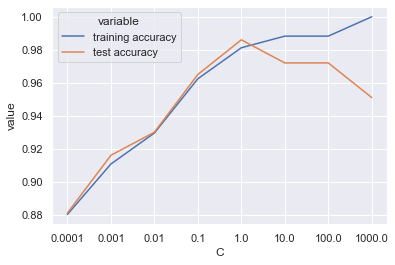

In [140]:
from sklearn.svm import LinearSVC

C_settings = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
training_accuracy = []
test_accuracy = []

for c in C_settings:
    svm = LinearSVC(dual=False, C=c).fit(bc_features_train, bc_target_train)
    training_accuracy.append(svm.score(bc_features_train, bc_target_train))
    test_accuracy.append(svm.score(bc_features_test, bc_target_test))

results = pd.DataFrame([C_settings, training_accuracy, test_accuracy]).T
results.columns = ["C", "training accuracy", "test accuracy"]
results["C"] = results["C"].astype(str)
results = pd.melt(results, ['C'])
sns.lineplot(x='C', y='value', hue='variable', data=results)

In [141]:
svm = LinearSVC(dual=False, C=1).fit(bc_features_train, bc_target_train)
print("Training set score: {:.3f}".format(svm.score(bc_features_train, bc_target_train)))
print("Test set score: {:.3f}".format(svm.score(bc_features_test, bc_target_test)))

Training set score: 0.981
Test set score: 0.986


# Decision Tree Classifier

In [142]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(random_state=99).fit(bc_features_train, bc_target_train)
print("Accuracy on training set: {:.3f}".format(tree.score(bc_features_train, bc_target_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(bc_features_test, bc_target_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.916


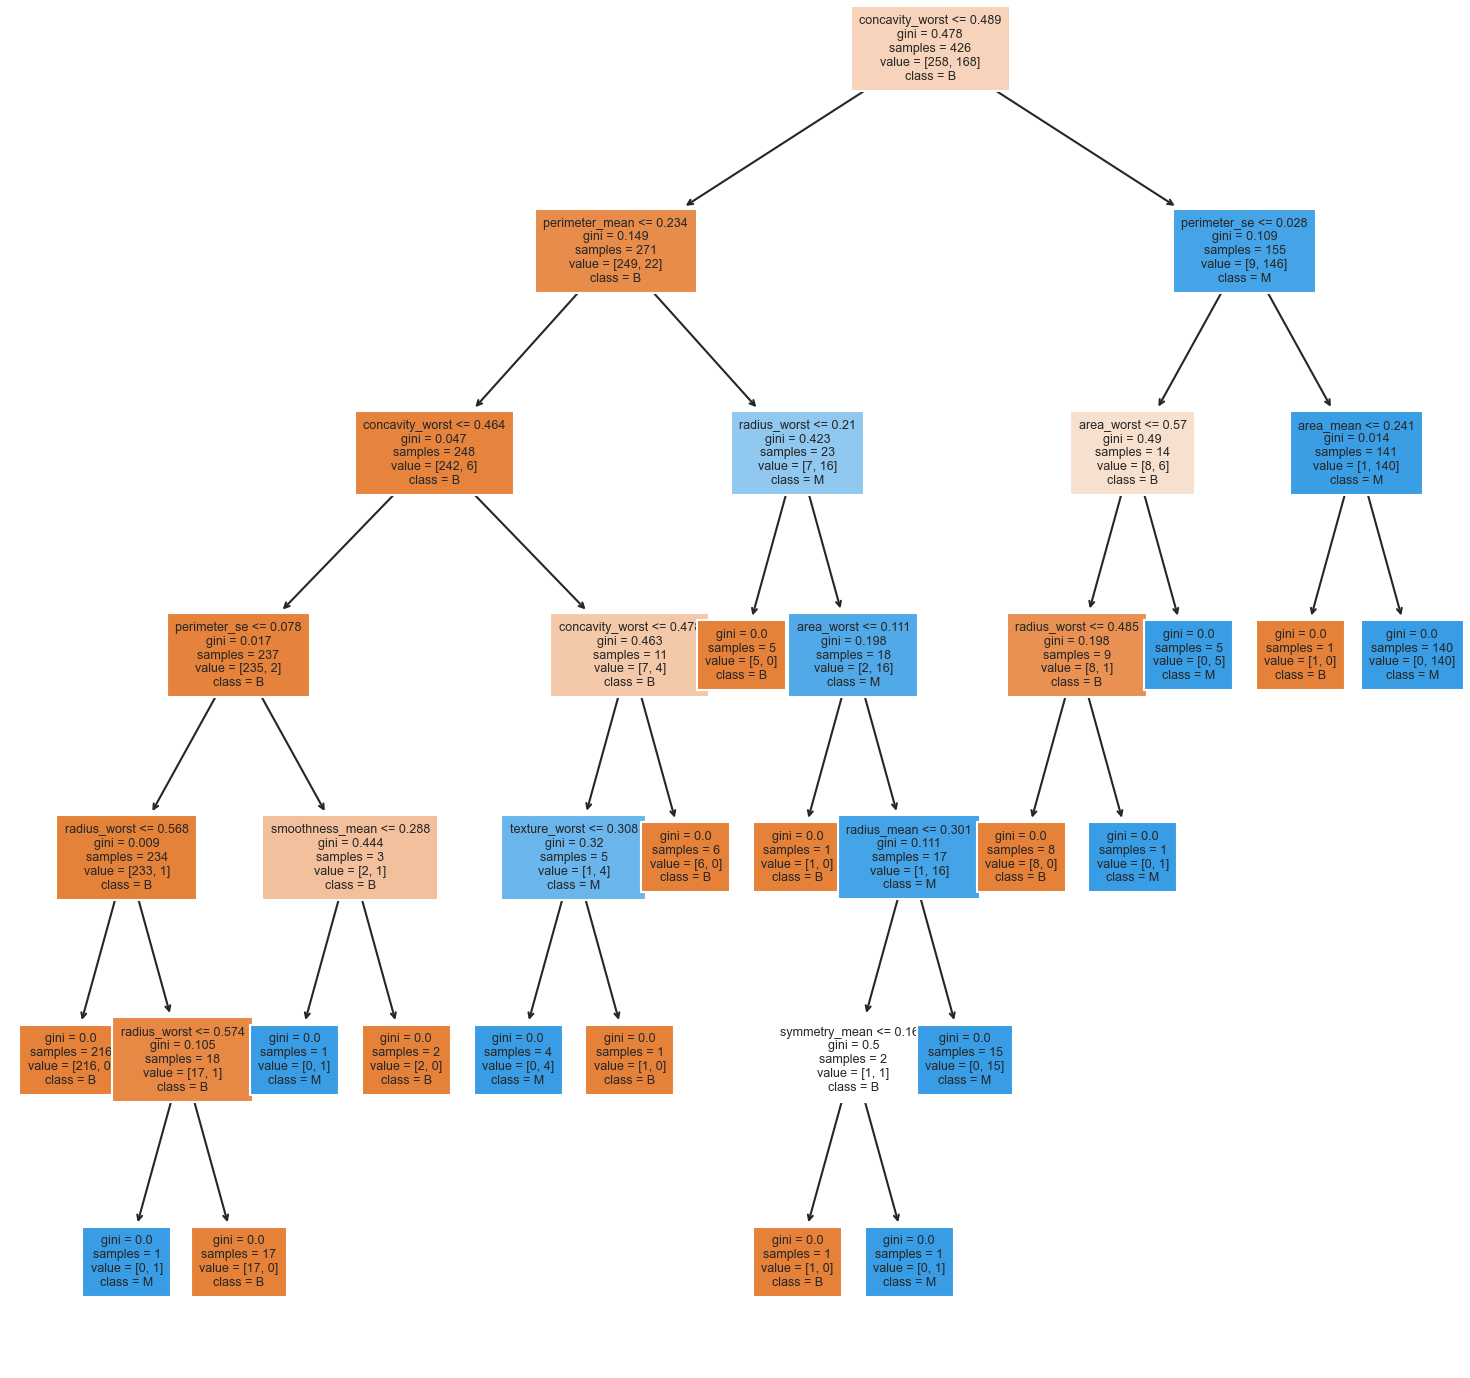

In [143]:
fn = list(bc.columns)
cn = ["B", "M"]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6), dpi=150)
plot_tree(tree, feature_names=fn, class_names=cn, filled=True, fontsize=6);

In [144]:
# max_depth
tree = DecisionTreeClassifier(max_depth=2, random_state=99).fit(bc_features_train, bc_target_train)
print("Accuracy on training set: {:.3f}".format(tree.score(bc_features_train, bc_target_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(bc_features_test, bc_target_test)))

Accuracy on training set: 0.953
Accuracy on test set: 0.923


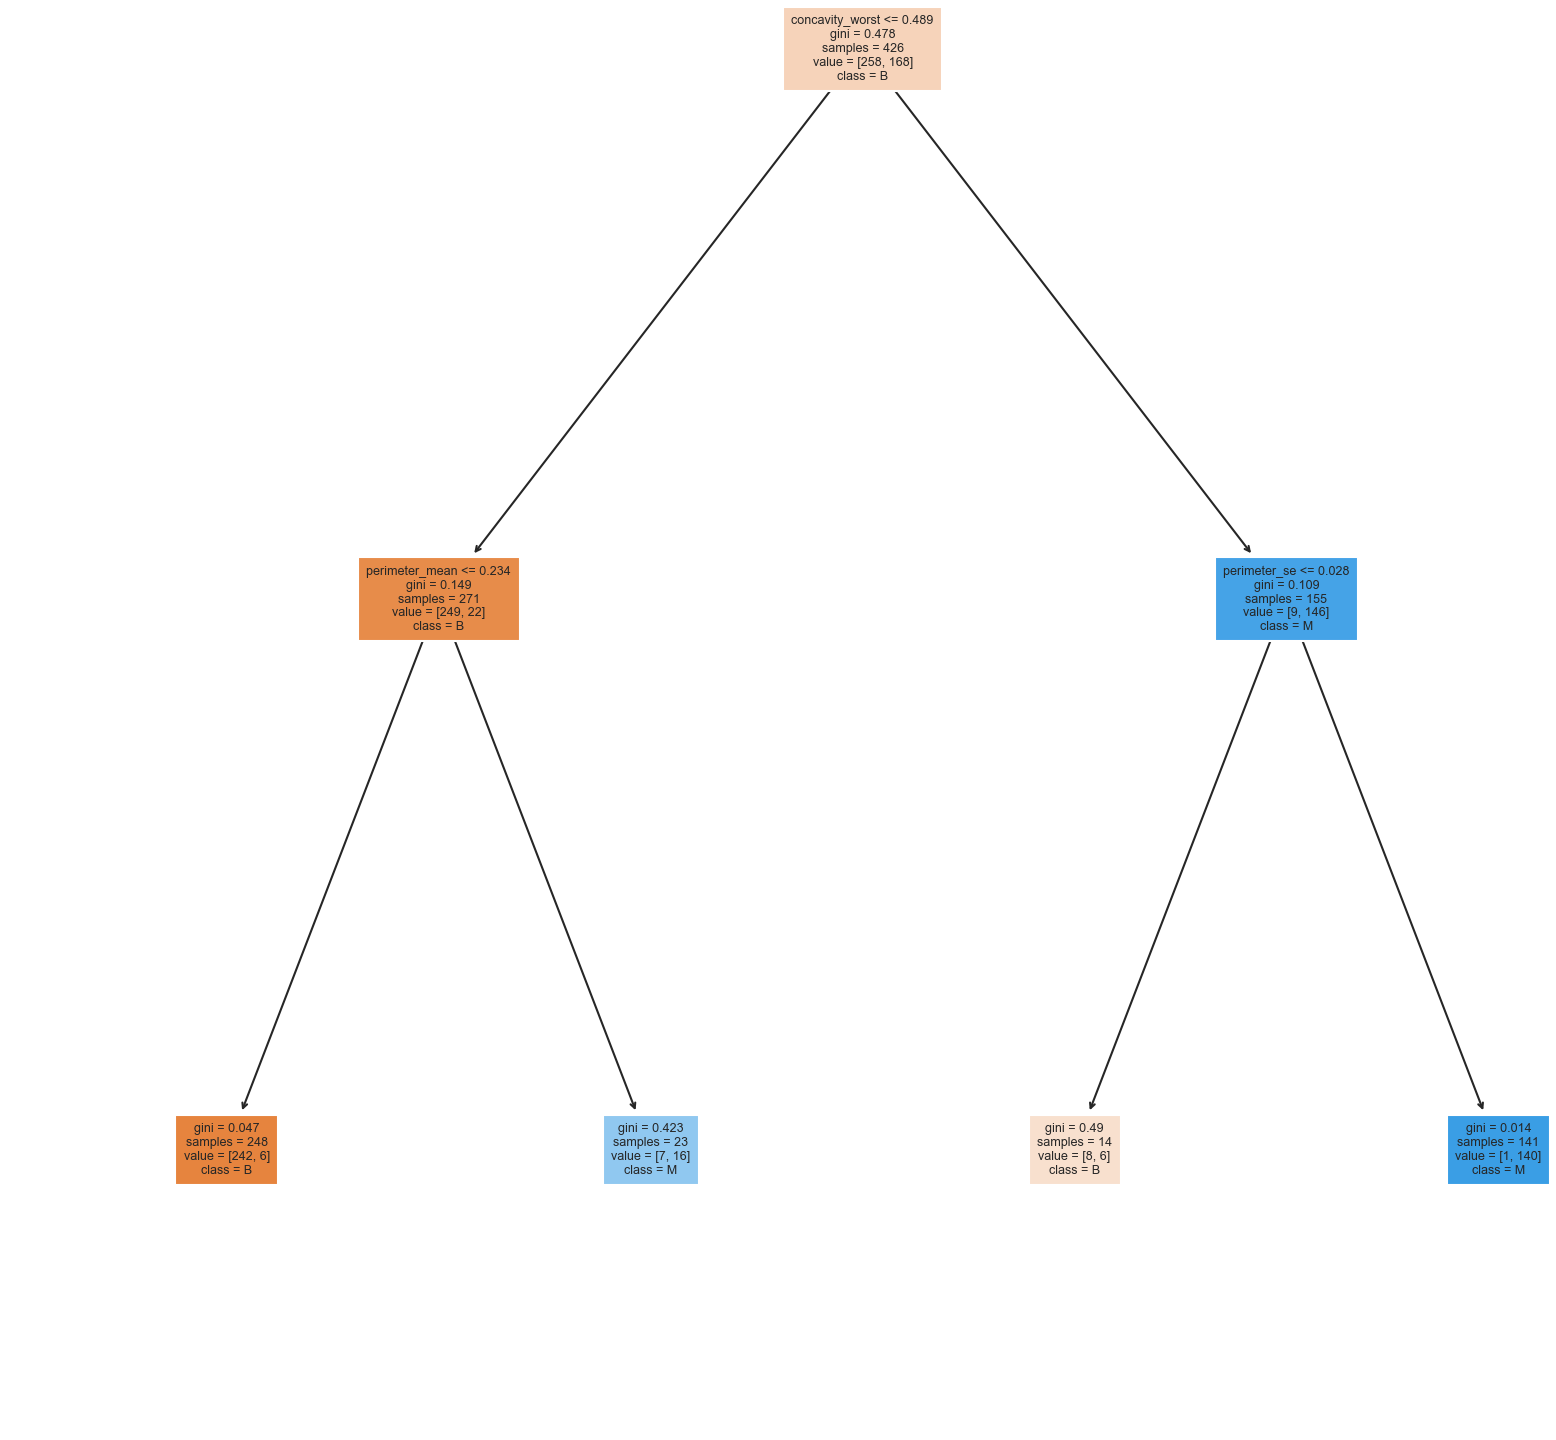

In [145]:
fn = list(bc.columns)
cn = ["B", "M"]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize =(7,7), dpi=150)
plot_tree(tree, feature_names=fn, class_names=cn, filled=True, fontsize=6);

In [146]:
# min_samples_split
tree = DecisionTreeClassifier(min_samples_split=3, random_state=98).fit(bc_features_train, bc_target_train)
print("Accuracy on training set: {:.3f}".format(tree.score(bc_features_train, bc_target_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(bc_features_test, bc_target_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.944


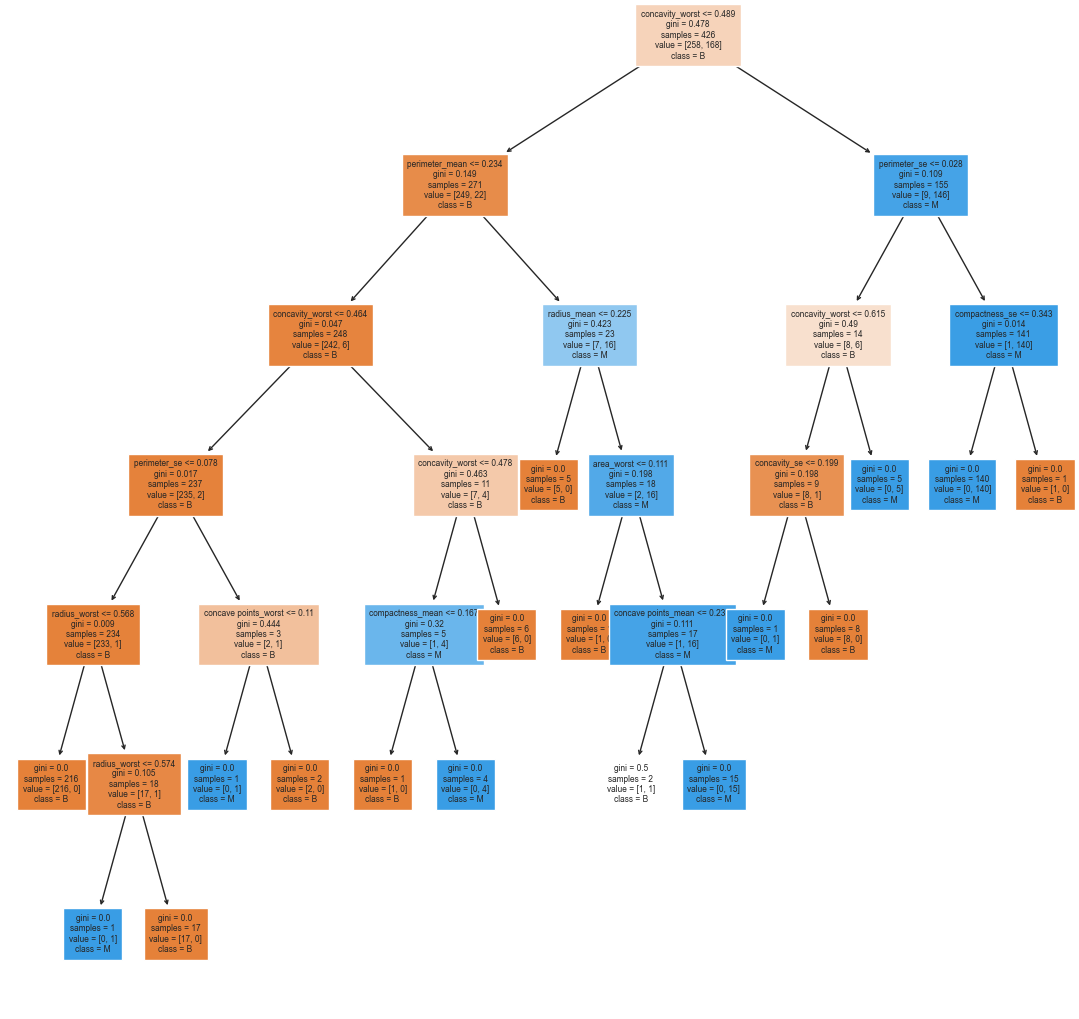

In [147]:
fn = list(bc.columns)
cn = ["B", "M"]
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize =(10,10), dpi=100)
plot_tree(tree, feature_names=fn, class_names=cn, filled=True, fontsize=6);

In [148]:
print(tree.feature_importances_)

[0.         0.03053723 0.         0.09372788 0.         0.
 0.00790151 0.         0.00435745 0.         0.         0.
 0.         0.04322787 0.         0.         0.00980684 0.00877945
 0.         0.         0.         0.00983468 0.         0.
 0.00826302 0.         0.         0.77697948 0.00658459 0.        ]


In [149]:
print(sum(tree.feature_importances_))

1.0


In [86]:
# Feature importances

fn = bc.columns[1:-1]
fi = tree.feature_importances_[1:]
fn_sorted = [x for _, x in sorted(zip(fi,fn), reverse=True)]
fi_sorted = sorted(fi, reverse=True)

for fn, fi in zip(fn_sorted, fi_sorted):
    print(f"{fn:25} {fi:.3f}")

concavity_worst           0.844
perimeter_mean            0.110
perimeter_se              0.047
texture_worst             0.000
texture_se                0.000
texture_mean              0.000
symmetry_worst            0.000
symmetry_se               0.000
symmetry_mean             0.000
smoothness_worst          0.000
smoothness_se             0.000
smoothness_mean           0.000
radius_worst              0.000
radius_se                 0.000
radius_mean               0.000
perimeter_worst           0.000
fractal_dimension_se      0.000
fractal_dimension_mean    0.000
concavity_se              0.000
concavity_mean            0.000
concave points_worst      0.000
concave points_se         0.000
concave points_mean       0.000
compactness_worst         0.000
compactness_se            0.000
compactness_mean          0.000
area_worst                0.000
area_se                   0.000
area_mean                 0.000


# Decision Tree Regressor

In [88]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(min_samples_split=50).fit(ins_features_train, ins_target_train)

print("Accuracy on training set: {:.3f}".format(tree.score(ins_features_train, ins_target_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(ins_features_test, ins_target_test)))

# Which features are most important?
fn = ins.columns
fi = tree.feature_importances_

print()

for name, imp in zip(fn, fi):
    print(f"{name:18} {imp:.3f}")

Accuracy on training set: 0.892
Accuracy on test set: 0.822

sex_male           0.001
smoker_yes         0.682
region_northeast   0.001
region_northwest   0.000
region_southeast   0.000
region_southwest   0.000
age                0.123
bmi                0.182
children           0.011


# Random Forest Classifier

In [91]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=99)
rf.fit(bc_features_train, bc_target_train)

print("Accuracy on training set: {:.3f}".format(rf.score(bc_features_train, bc_target_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(bc_features_test, bc_target_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.965


In [92]:
# Feature importances
print(list(rf.feature_importances_))

[0.048042837814910005, 0.012585661228788942, 0.04383655993175015, 0.042508053265459464, 0.006641573723749919, 0.01042807094359837, 0.05156751524678887, 0.11286669345489336, 0.002721365979592152, 0.004087745294090676, 0.017098130020217487, 0.002896073693768823, 0.01384876857982486, 0.030686606267585317, 0.00238677776664299, 0.0036310085909924466, 0.00551368828829161, 0.0054750176787268495, 0.0032480605613785956, 0.005031978389682619, 0.08865644648038211, 0.014300980575013252, 0.14063994295479917, 0.11630471537935785, 0.01032273678786047, 0.014160230574084177, 0.0421948333011599, 0.13253099111705424, 0.008992200018371258, 0.006794736091184021]


In [93]:
# Which features are most important?
fn_sorted = [fn for fi, fn in sorted(zip(rf.feature_importances_, list(bc.columns)[:-1]), reverse=True)]
fi_sorted = sorted(list(rf.feature_importances_), reverse=True)

for fn, fi in zip(fn_sorted, fi_sorted):
    print(f"{fn:25} {fi:.3f}")

texture_worst             0.141
concavity_worst           0.133
perimeter_worst           0.116
concavity_mean            0.113
fractal_dimension_se      0.089
compactness_mean          0.052
diagnosis_M               0.048
texture_mean              0.044
perimeter_mean            0.043
compactness_worst         0.042
perimeter_se              0.031
fractal_dimension_mean    0.017
radius_worst              0.014
smoothness_worst          0.014
texture_se                0.014
radius_mean               0.013
smoothness_mean           0.010
area_worst                0.010
concave points_worst      0.009
symmetry_worst            0.007
area_mean                 0.007
compactness_se            0.006
concavity_se              0.005
symmetry_se               0.005
symmetry_mean             0.004
smoothness_se             0.004
concave points_se         0.003
radius_se                 0.003
concave points_mean       0.003
area_se                   0.002


# Random Forest Regressor

In [94]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=500, max_depth=5, random_state=99)
rfr.fit(ins_features_train, ins_target_train)

print("Accuracy on training set: {:.3f}".format(rfr.score(ins_features_train, ins_target_train)))
print("Accuracy on test set: {:.3f}".format(rfr.score(ins_features_test, ins_target_test)))

Accuracy on training set: 0.899
Accuracy on test set: 0.834


# Gradient Boosting Classifier

In [150]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=1000, max_depth=3, subsample=1, learning_rate=0.1, random_state=99)
gbc.fit(bc_features_train, bc_target_train)

print("Accuracy on training set: {:.3f}".format(gbc.score(bc_features_train, bc_target_train)))
print("Accuracy on test set: {:.3f}".format(gbc.score(bc_features_test, bc_target_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.986


# Gradient Boosting Regressor

In [151]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=500, max_depth=3, subsample=0.4, learning_rate=0.005, random_state=99)
gbr.fit(ins_features_train, ins_target_train)

print("Accuracy on training set: {:.3f}".format(gbr.score(ins_features_train, ins_target_train)))
print("Accuracy on test set: {:.3f}".format(gbr.score(ins_features_test, ins_target_test)))

Accuracy on training set: 0.878
Accuracy on test set: 0.844


# Cross-Validation

In [153]:
bc_features = bc.iloc[:,1:]
bc_target = bc.iloc[:,0]

In [154]:
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression(max_iter = 5000, C=10)
scores = cross_val_score(logreg, bc_features, bc_target)
print(scores)
print(f"Mean cross-validation score: {np.mean(scores):.3f}")

[0.98245614 0.98245614 0.98245614 0.96491228 0.99115044]
Mean cross-validation score: 0.981


In [155]:
svm = LinearSVC(dual=False, C=1)
scores = cross_val_score(svm, bc_features, bc_target)
print(scores)
print(f"Mean cross-validation score: {np.mean(scores):.4f}")

[0.98245614 0.98245614 0.96491228 0.96491228 0.99115044]
Mean cross-validation score: 0.9772


In [156]:
from sklearn.model_selection import LeaveOneOut


SVMScores = cross_val_score(svm, bc_features, bc_target, cv=LeaveOneOut())


print(f"SVM mean leave-one-out cross-validation score: {np.mean(SVMScores):.4f}")


SVM mean leave-one-out cross-validation score: 0.9736


In [158]:
print(SVMScores)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [159]:
ins_features = ins.iloc[:,:-1]
ins_target = ins.iloc[:,-1]

rfr = RandomForestRegressor(n_estimators=500, max_depth = 5, random_state=99)
gbr = GradientBoostingRegressor(n_estimators=500, max_depth = 3, subsample = 0.4, learning_rate = 0.005, random_state=99)

rfrScores = cross_val_score(rfr, ins_features, ins_target)
gbrScores = cross_val_score(gbr, ins_features, ins_target)

print(f"RFR Mean cross-validation score: {np.mean(rfrScores):.3f}")
print(f"GBR Mean cross-validation score: {np.mean(gbrScores):.3f}")

RFR Mean cross-validation score: 0.858
GBR Mean cross-validation score: 0.855


# Grid Search

In [164]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_neighbors": [k for k in range(1, 49, 2)],
    "weights": ["uniform", "distance"]
}

knn = GridSearchCV(estimator=KNeighborsClassifier(),
                   param_grid=params) 

knn.fit(bc_features_train, bc_target_train)

knn.score(bc_features_test, bc_target_test)
#print("Cross-Validation Scores: {}".format(scores))
#print("Mean Cross-Val Score: {:.3f}".format(np.mean(scores)))

0.986013986013986

In [165]:
knn.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [166]:
params = {
    "n_estimators": [300],
    "min_samples_split": [10, 25, 50, 100],
    "learning_rate": [0.005, 0.01, 0.1, 0.2],
}

gbr = GridSearchCV(estimator=GradientBoostingRegressor(),
                   param_grid=params, n_jobs=-1, cv=8) 

gbr.fit(ins_features_train, ins_target_train)

gbr.best_score_

0.8637349412474835

In [167]:
gbr.best_params_

{'learning_rate': 0.01, 'min_samples_split': 10, 'n_estimators': 300}

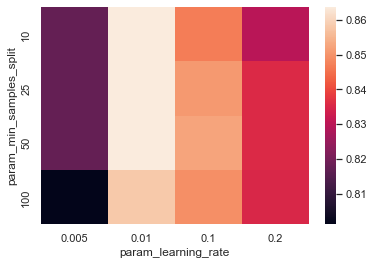

In [168]:
results = pd.DataFrame(gbr.cv_results_)

pvt = pd.pivot_table(pd.DataFrame(results),
    values='mean_test_score', index='param_min_samples_split', columns='param_learning_rate')

ax = sns.heatmap(pvt)

In [169]:
params = {
    "n_estimators": [300],
    "min_samples_split": [5, 8, 10, 12, 15],
    "learning_rate": [0.0075, 0.01, 0.0125],
}

gbr = GridSearchCV(estimator=GradientBoostingRegressor(),
                   param_grid=params, n_jobs=-1, cv=8) 

gbr.fit(ins_features_train, ins_target_train)

print(gbr.best_score_)
print(gbr.best_params_)



0.8663612463677492
{'learning_rate': 0.0125, 'min_samples_split': 5, 'n_estimators': 300}


In [170]:
gbr.score(ins_features_test, ins_target_test)

0.8412767700416576

# Classification Metrics

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix

logreg = LogisticRegression(dual=False, C=1).fit(bc_features_train, bc_target_train)
pred_logreg = logreg.predict(bc_features_test)

confusion_matrix(bc_target_test, pred_logreg)

In [ ]:
# accuracy, precision, recall, f-score

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print("Accuracy: {:.3f}".format(accuracy_score(bc_target_test, pred_logreg)))
print("Precision: {:.3f}".format(precision_score(bc_target_test, pred_logreg)))
print("Recall: {:.3f}".format(recall_score(bc_target_test, pred_logreg)))
print("F-Score: {:.3f}".format(f1_score(bc_target_test, pred_logreg)))

In [ ]:
# setting Logistic Regression probability threshold at values other than 0.5

pred_logreg_thresh = logreg.predict_proba(bc_features_test)[:,1] > 0.3

confusion_matrix(bc_target_test, pred_logreg_thresh)

In [ ]:
# see what it does to our accuracy, precision, recall and f-score

print("Accuracy: {:.3f}".format(accuracy_score(bc_target_test, pred_logreg_thresh)))
print("Precision: {:.3f}".format(precision_score(bc_target_test, pred_logreg_thresh)))
print("Recall: {:.3f}".format(recall_score(bc_target_test, pred_logreg_thresh)))
print("F-Score: {:.3f}".format(f1_score(bc_target_test, pred_logreg_thresh)))

In [ ]:
# plot precision recall curve of LogReg

from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(8,6))
precision, recall, thresholds = precision_recall_curve(bc_target_test, logreg.decision_function(bc_features_test))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="threshold 0.5", fillstyle="none", c='k')
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

In [ ]:
# plot precision-recall curves of LogReg vs GBC

plt.figure(figsize=(8,6))

precision, recall, thresholds = precision_recall_curve(bc_target_test, logreg.decision_function(bc_features_test))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="threshold 0.5", fillstyle="none", c='k')
plt.xlabel("Precision")
plt.ylabel("Recall")

precision_gbc, recall_gbc, thresholds_gbc = precision_recall_curve(
bc_target_test, gbc.predict_proba(bc_features_test)[:, 1])
plt.plot(precision, recall, label="logreg")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
label="threshold 0.5 logreg", fillstyle="none", c='k')
plt.plot(precision_gbc, recall_gbc, label="gbc")
close_default_gbc = np.argmin(np.abs(thresholds_gbc - 0.5))
plt.plot(precision_gbc[close_default_gbc], recall_gbc[close_default_gbc], '^', c='k',
markersize=10, label="threshold 0.5 gbc", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [ ]:
# area under precision-recall curve

from sklearn.metrics import average_precision_score

ap_rf = average_precision_score(bc_target_test, gbc.predict_proba(bc_features_test)[:, 1])
ap_logreg = average_precision_score(bc_target_test, logreg.decision_function(bc_features_test))
print("Average precision of Gradient Boosting Classifier: {:.3f}".format(ap_rf))
print("Average precision of Logistic Regression: {:.3f}".format(ap_logreg))

In [ ]:
# plot ROC curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(bc_target_test, logreg.decision_function(bc_features_test))

plt.figure(figsize=(8,7))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
 label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(bc_target_test, gbc.predict_proba(bc_features_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve logreg")
plt.plot(fpr_gbc, tpr_gbc, label="ROC Curve gbc")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
 label="threshold zero logreg", fillstyle="none", c='k', mew=2)
close_default_gbc = np.argmin(np.abs(thresholds_gbc - 0.5))
plt.plot(fpr_gbc[close_default_gbc], tpr[close_default_gbc], '^', markersize=10,
 label="threshold 0.5 gbc", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [ ]:
# area under ROC curve

from sklearn.metrics import roc_auc_score

gbc_auc = roc_auc_score(bc_target_test, gbc.predict_proba(bc_features_test)[:, 1])
logreg_auc = roc_auc_score(bc_target_test, logreg.decision_function(bc_features_test))
print("AUC for Gradient Boosting Classifier: {:.3f}".format(gbc_auc))
print("AUC for Logistic Regression: {:.3f}".format(logreg_auc))

In [ ]:
from tpot import TPOTClassifier
from sklearn.datasets import load_digits

digits = load_digits()
dig_features_train, dig_features_test, dig_target_train, dig_target_test = train_test_split(digits.data, digits.target)

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, n_jobs=-1)
tpot.fit(dig_features_train, dig_target_train)

In [ ]:
digits

In [ ]:
print(tpot.score(dig_features_test, dig_target_test))

In [ ]:
from sklearn.decomposition import PCA

X = PCA(n_components=2).fit_transform(iris.iloc[:,:-1])

X

irisPCA = pd.concat([pd.DataFrame(X), iris], axis=1)

irisPCA